In [1]:
# mengatur library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

Data dapat diakses <a href="https://www.kaggle.com/mirichoi0218/insurance">disini</a>

In [34]:
# membaca data

df = pd.read_csv('data/insurance.csv')
print('Data kita memiliki', df.shape[0], 'baris, dan', df.shape[1], 'kolom')
df.head()

Data kita memiliki 1338 baris, dan 7 kolom


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Analisis Data Eksploratif

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


Dari output diatas, dapat diketahui bahwa:
- Kolom age, bmi, children dan charges merupakan kolom bertipe data numerik
- Kolom sex, smoker dan region merupakan kolom bertipe data kategorik

In [5]:
# memeriksa adanya data yang hilang (missing values)
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Dapat dipastikan bahwa tidak terdapat data yang hilang pada data

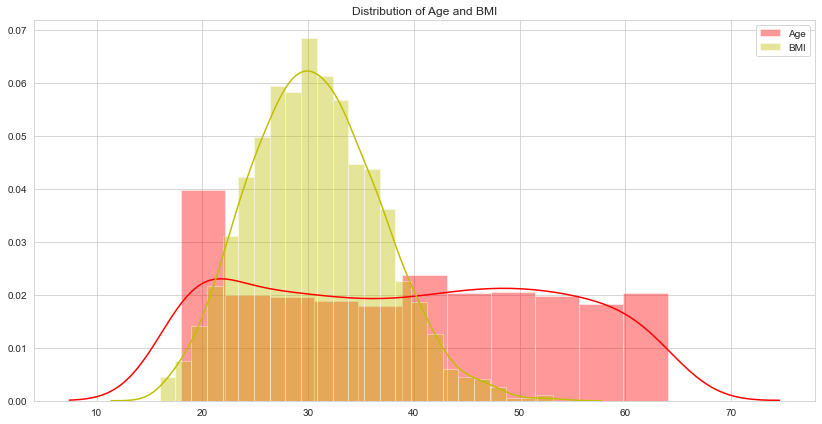

In [6]:
# membuat visualisasi untuk data numerik
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.distplot(df['age'], kde=True, color='r', label='Age')
sns.distplot(df['bmi'], kde=True, color='y', label='BMI')
plt.title('Distribution of Age and BMI')
plt.xlabel("")
plt.legend()
plt.show()

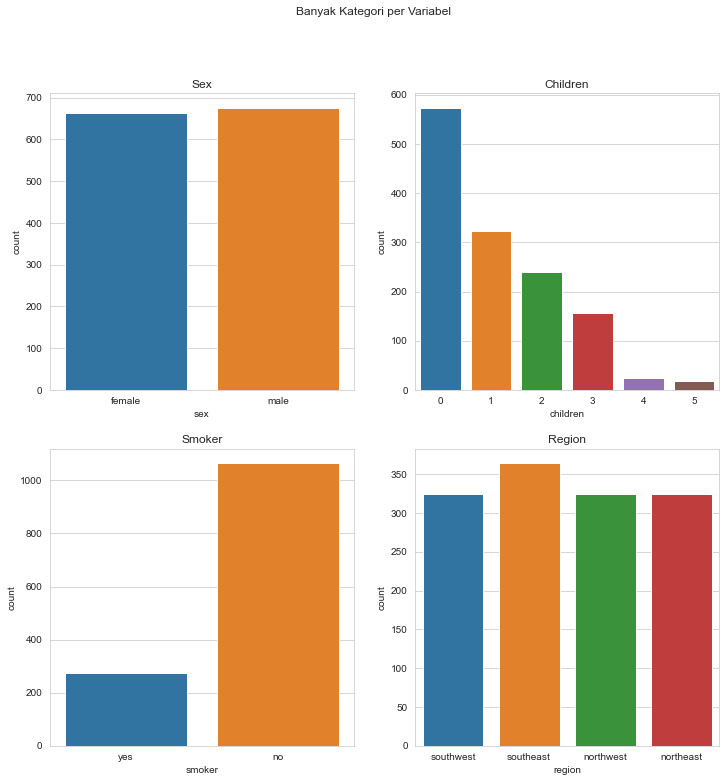

In [35]:
# membuat visualisasi data kategorik
fig, ax = plt.subplots(2,2, figsize=(12,12))
plt.suptitle('Banyak Kategori per Variabel')

sns.countplot(ax=ax[0,0], x=df['sex'])
ax[0,0].set_title('Sex')

sns.countplot(ax=ax[0,1], x=df['children'])
ax[0,1].set_title('Children')

sns.countplot(ax=ax[1,0], x=df['smoker'])
ax[1,0].set_title('Smoker')

sns.countplot(ax=ax[1,1], x=df['region'])
ax[1,1].set_title('Region')

plt.show()

In [7]:
cat_col = ['sex', 'children', 'smoker', 'region']
for col in cat_col:
    print('\n Banyak kategori per variabel {}'.format(col))
    print(df[col].value_counts())


 Banyak kategori per variabel sex
male      676
female    662
Name: sex, dtype: int64

 Banyak kategori per variabel children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

 Banyak kategori per variabel smoker
no     1064
yes     274
Name: smoker, dtype: int64

 Banyak kategori per variabel region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [9]:
# membagi data menjadi X (features) dan y (target)
X_awal = df.drop('charges', axis=1)
y = df['charges']

# membuat variabel dummy untuk data kategorik
X = pd.get_dummies(data=X_awal)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


# Membuat Model menggunakan Library statsmodels

In [36]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()

# prediksi
pred = results.predict(X)
# residual
resid = results.resid

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sun, 22 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:55:39   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_female        -201.1179    418.353     -0.481      0.631   -1021.823     619.587
sex_male          -332.4323    425.031     -0.782      0.434   -1166.237     501.372
smoker_no        -1.219e+04    419.605    -29.054      0.000    -1.3e+04   -1.14e+04
smoker_yes        1.166e+04    457.738     25.468      0.000    1.08e+04    1.26e+04
region_northeast   453.6217    332.155      1.366      0.172    -197.983    1105.226
region_northwest   100.6578    333.891      0.301      0.763    -554.352     755.668
region_southeast  -581.4004    381.765     -1.523      0.128   -1330.328     167.527
region_southwest  -506.4293    351.178     -1.442      0.150   -1195.353     182.494
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     1.47e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.64e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Dari hasil analisis regresi diatas, dapat dilihat bahwa nilai R-Square yang dihasilkan berada di sekitaran 75%

# Asumsi Klasik

## Uji Normalitas

Uji Normalitas dengan Melihat Distribusi Residual menggunakan Histogram


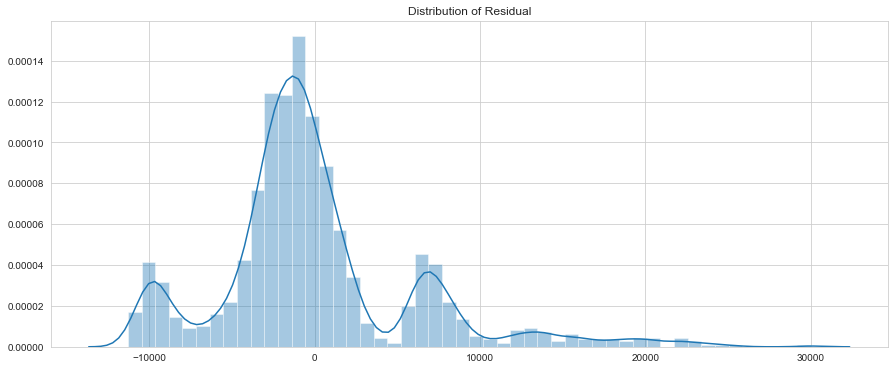

Uji Normalitas menggunakan Uji Shapiro-Wilk

Hipotesis
H0 : Residual Berdistribusi Normal
H1 : Residual Tidak Berdistribusi Normal

Kriteria Penolakan : Tolak H0 jika p-value < 0.05

Nilai p-value untuk uji Shapiro-Wilk adalah 8.384717170675225e-29


'Data anda tidak berdistribusi normal'

In [13]:
from scipy.stats import shapiro

# Normality
def normalitas(res):
    '''
    Uji normalitas dengan menggunakan visualisasi data dan uji statistik.
    masukkan nilai residual sebagai input
    
    '''
    print('Uji Normalitas dengan Melihat Distribusi Residual menggunakan Histogram')
    plt.figure(figsize=(15,6))
    sns.distplot(res, kde=True)
    plt.title('Distribution of Residual')
    plt.show()
    plt.close()
    alpha = 0.05
    stat, p = shapiro(res)
    print('Uji Normalitas menggunakan Uji Shapiro-Wilk\n')
    print('Hipotesis:')
    print('H0 : Residual Berdistribusi Normal')
    print('H1 : Residual Tidak Berdistribusi Normal\n')
    print('Kriteria Penolakan : Tolak H0 jika p-value < 0.05\n')
    print('Nilai p-value untuk uji Shapiro-Wilk adalah {}'.format(p))
    if p > alpha:
        return 'Data anda berdistribusi normal'
    else:
        return 'Data anda tidak berdistribusi normal'

normalitas(resid)

## Uji Heteroskedastisitas

Uji Heteroskedastisitas dengan Melihat Scatter Plot Prediksi vs Residual


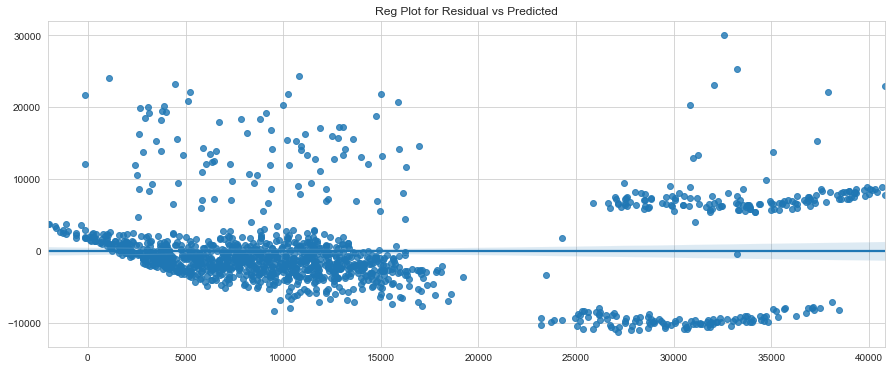

Uji Heteroskedastisitas menggunakan Uji Breusch Pagan

Hipotesis
H0 : Tidak terjadi heteroskedastisitas pada data
H1 : Terjadi heteroskedastisitas pada data

Kriteria Penolakan : Tolak H0 jika p-value < 0.05

Nilai p-value untuk uji heteroskedastisitas adalah sebesar: 2.2395858195245403e-21


'Terjadi heteroskedastisitas pada data'

In [14]:
import statsmodels.stats.api as sms

def heteroskedastisitas(res, pred, exog):
    '''
    Uji heteroskedastisitas dengan menggunakan visual dan uji statistik.
    masukkan nilai residual, prediksi, dan variabel X ke dalam fungsi
    
    '''
    print('Uji Normalitas dengan Melihat Scatter Plot Prediksi vs Residual')
    plt.figure(figsize=(15,6))
    sns.regplot(x=pred, y=res)
    plt.title('Reg Plot for Residual vs Predicted')
    plt.show()
    test = sms.het_breuschpagan(res, exog)
    p_val = test[1]
    alpha = 0.05
    print('Uji Heteroskedastisitas menggunakan Uji Breusch Pagan\n')
    print('Hipotesis:')
    print('H0 : Tidak terjadi heteroskedastisitas pada data')
    print('H1 : Terjadi heteroskedastisitas pada data\n')
    print('Kriteria Penolakan : Tolak H0 jika p-value < 0.05\n')
    print('Nilai p-value untuk uji heteroskedastisitas adalah sebesar: {}'.format(p_val))
    if p_val > 0.05:
        return 'Tidak terjadi heteroskedastisitas pada data'
    else:
        return 'Terjadi heteroskedastisitas pada data'

heteroskedastisitas(res=resid, pred=pred, exog=results.model.exog)

## Uji Autokorelasi

In [17]:
import statsmodels.stats

def autokorelasi(res):
    '''
    Uji autokorelasi menggunakan Durbin-Watson statistics.
    jika hasil = 2, menunjukkan tidak ada autokorelasi dalam data.
    jika hasil mendekati 0, menunjukkan adanya autokorelasi positif,
    jika hasil mendekati 4, menunjukkan adanya autokorelasi negatif
    '''
    print('Uji Autokorelasi menggunakan Durbin-Watson\n')
    print('Hipotesis:')
    print('H0 : Tidak terjadi autokorelasi pada data')
    print('H1 : Terjadi autokorelasi pada data\n')
    print('Kriteria Penolakan:')
    print('Gagal Tolak H0 jika DW = 2\n')
    dw = statsmodels.stats.stattools.durbin_watson(res)
    print('Nilai p-value untuk uji autokorelasi adalah sebesar {}'.format(dw))
    if dw >= 1.8 and dw <= 2.2:
        return 'Tidak terdapat autokorelasi pada data'
    elif dw < 1.8:
        return 'Tedapat autokorelasi positif pada data'
    else:
        return 'Terdapat autokorelasi negatif pada data'

autokorelasi(resid)    

Uji Autokorelasi menggunakan Durbin-Watson

Hipotesis:
H0 : Tidak terjadi autokorelasi pada data
H1 : Terjadi autokorelasi pada data

Kriteria Penolakan:
Gagal Tolak H0 jika DW = 2

Nilai p-value untuk uji autokorelasi adalah sebesar 2.088422998667309


'Tidak terdapat autokorelasi pada data'

## Uji Multikolinearitas

NOTE : Fungsi ini dibuat untuk melihat multikolinearitas antara variabel numerik saja

Melihat Korelasi antar Variabel Numerik untuk Mengidentifikasi Adanya Multikolinearitas
Jika terdapat Korelasi > 0.7, terindikasi terdapat Multikolinearitas pada data


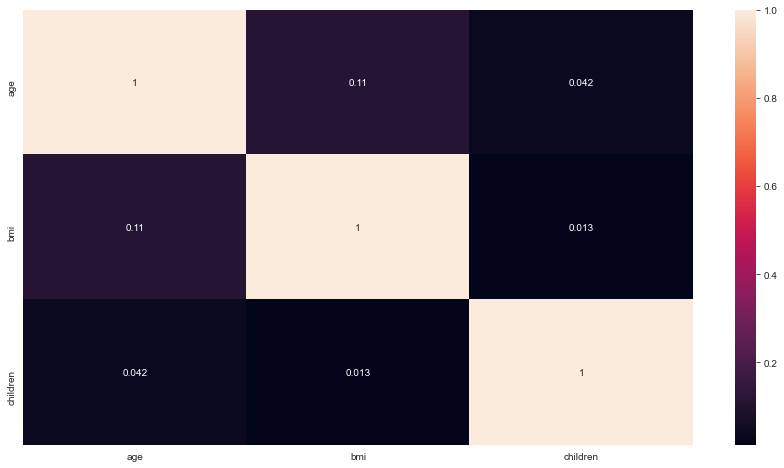

Uji Multikolinearitas menggunakan Nilai VIF

Hipotesis:
H0 : Tidak terjadi multikolinearitas pada data
H1 : Terjadi multikolinearitas pada data

Kriteria Penolakan:
Tolak H0 jika VIF > 10



,Variables,VIF,Kesimpulan
0,age,7.536550,Tidak Terjadi Multikolinearitas
1,bmi,7.846515,Tidak Terjadi Multikolinearitas
2,children,1.796637,Tidak Terjadi Multikolinearitas


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multikolinearitas(X):
    '''
    Uji multikolinearitas menggunakan visualisasi dan VIF.
    Visualisasi digunakan dengan membuat peta korelasi untuk melihat hubungan varibale dependen yang bersifat numerik.
    Jadi, menguji autokorelasi dengan melihat nilai VIF lebih disarankan
    '''
    print('NOTE : Fungsi ini dibuat untuk melihat multikolinearitas antara variabel numerik saja\n')
    print('Melihat Korelasi antar Variabel Numerik untuk Mengidentifikasi Adanya Multikolinearitas')
    print('Jika terdapat Korelasi > 0.7, terindikasi terdapat Multikolinearitas pada data')
    plt.figure(figsize=(15,8))
    sns.heatmap(X.corr(), annot=True)
    plt.show()
    print('Uji Multikolinearitas menggunakan Nilai VIF\n')
    print('Hipotesis:')
    print('H0 : Tidak terjadi multikolinearitas pada data')
    print('H1 : Terjadi multikolinearitas pada data\n')
    print('Kriteria Penolakan:')
    print('Tolak H0 jika VIF > 10\n')
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    kesimpulan = []
    for i in vif['VIF']:
        if i > 10:
            kesimpulan.append('Terjadi Multikolinearitas')
        else:
            kesimpulan.append('Tidak Terjadi Multikolinearitas')
    vif['Kesimpulan'] = kesimpulan
    return vif
    
    
multikolinearitas(X_awal[['age', 'bmi', 'children']])